# Transformada de Fourier con Python

__TODO:__

Graficar ondas

Sumar ondas para crear onda estacionaria.

Sumar ondas para crear batidos.

Animar esas ondas.

Hacer la transformada y transformada inversa de Fourier.

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def onda_armonica(A, phi, omega = 1.0, delta = 0.0):
    return A * np.sin(omega * phi + delta)

In [46]:
def trans_fourier(funcion, valores_x):
    normalizacion = np.divide(1.0, np.power(2.0 * np.pi, 0.5))
    valores_freq = valores_x 
    f_k = []
    N = len(valores_freq)
    delta = abs(valores_x[1] - valores_x[0])
    
    for i in range(N):
        terminos = []
        
        for n in range(N - 1):
            parte_exp = np.exp(-complex(0,1) * valores_x[n] * valores_freq[i])
            terminos.append(funcion[n] * parte_exp * delta)
            
        f_k.append(normalizacion * np.sum(terminos))
        
    return [valores_freq, np.array(f_k)]

In [40]:
n = 3000
A1 = 3.0
frec1 = 3.0
fase = np.linspace(0.0, 16.0 * math.pi, n)
onda1 = onda_armonica(A1, fase, frec1)

A2 = 4.2
frec2 = 0.5
onda2 = onda_armonica(A2, fase, frec2)

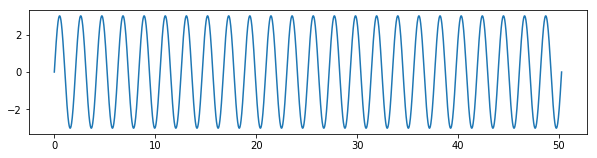

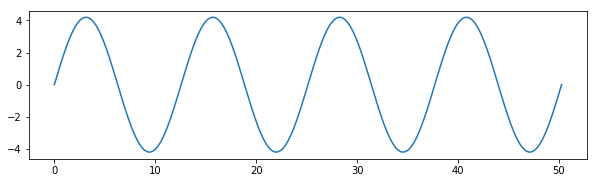

In [41]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.plot(fase, onda1)

plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 2)
plt.plot(fase, onda2)

In [42]:
def sumar_ondas(onda1, onda2): # Asume mismo intervalo y división para la fase
    return onda1 + onda2

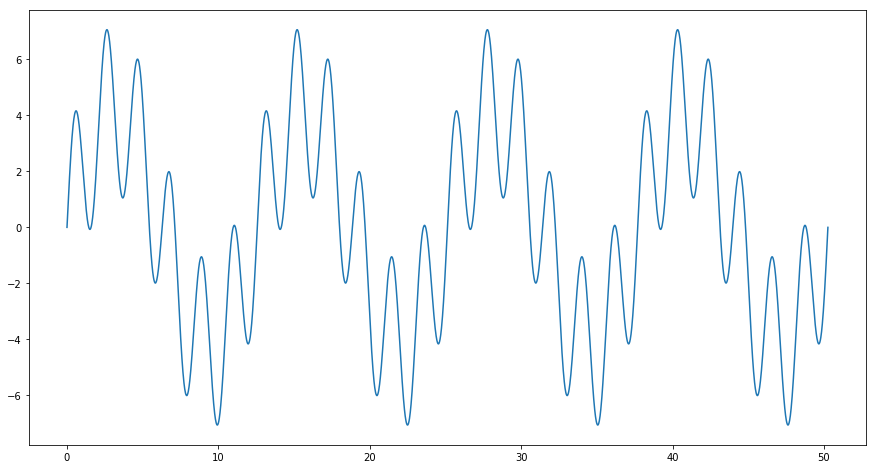

In [45]:
plt.figure(figsize = (15, 8))
plt.plot(fase, sumar_ondas(onda1, onda2))

In [ ]:
x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
k, gauss_trans = trans_fourier(gaussiana, x)
trans_real = [i.real for i in gauss_trans]